# ✅ Model Evaluation: Calories Burnt Prediction
This notebook evaluates the trained calories prediction model (`calories_model.pkl`) on test data to verify its accuracy and performance before deployment.


## 📦 Import Required Libraries
We import libraries to load the model, prepare the test data, and visualize results.


In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
sns.set(style='whitegrid')


## 📥 Load Dataset
Load the same dataset and split into train/test to evaluate the model on unseen data.


In [2]:
df = pd.read_csv('C:/Users/OS/Desktop/calories-burnt-prediction-ML/data/calories.csv')
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## 🔄 Encode Gender
Convert the `Gender` column into numeric values for model compatibility.


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


## ✂️ Prepare Test Data
Separate features and target variable, then create a train/test split.


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(['Calories', 'User_ID'], axis=1)
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 💾 Load the Trained Model
We load `calories_model.pkl` saved during training.


In [5]:
model = joblib.load('C:/Users/OS/Desktop/calories-burnt-prediction-ML/models/calories_model.pkl')
print('Model loaded successfully!')


Model loaded successfully!


## 📊 Predict and Evaluate
Make predictions on the test set and calculate MAE, RMSE, and R².


In [6]:
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


MAE: 1.50
RMSE: 2.14
R² Score: 0.999


## 📈 Actual vs Predicted Calories
Visualize how close the predictions are to actual values.


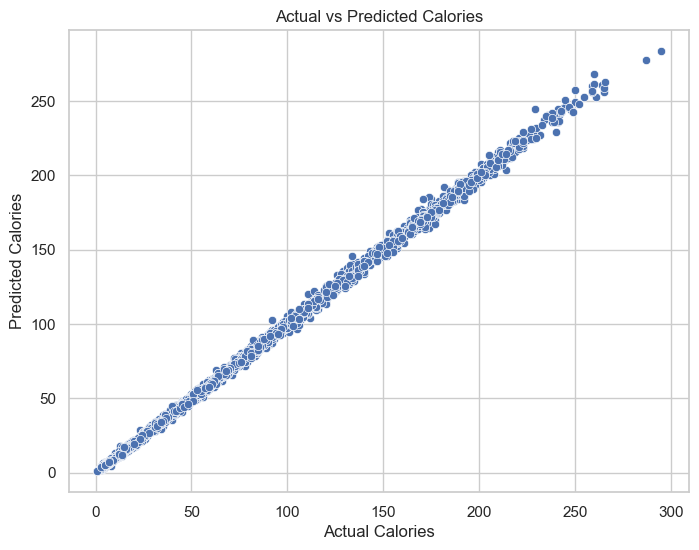

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=preds)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()
